In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader,WeightedRandomSampler
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import torch

### Apply different transforms to augment the dataset

The transforms are done online when called by the DataLoader, so every time its called to generate a batch the transforms are applied randomly,
which allows the model to see the same image differently almost every epoch

In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5, fill=128), #augmentation
    transforms.RandomRotation(10), #augmentation
    transforms.RandomResizedCrop(size=(256, 256), scale=(0.5, 1.0), ratio=(0.75, 1.33)), #resizing is essential but cropping is augmentation
    transforms.RandomHorizontalFlip(0.5), #augmentation
    transforms.ColorJitter(brightness=0.1, contrast=0.1), #augmentation 
    transforms.ToTensor(), #essential
])

Read the data

In [ ]:
trainImages = datasets.ImageFolder(
    root="StyleClassificationIndoors/train",
    transform=train_transforms,
)

The boho and the minimalist classes are outliers in the terms of number of images. boho: 918, minimalist: 555

In [4]:
counter = Counter(trainImages.targets)
for class_index, count in counter.most_common():
    class_name = trainImages.classes[class_index]
    print(f"{class_name}: {count}")

boho: 918
eclectic: 809
modern: 809
farmhouse: 795
coastal: 794
mediterranean: 789
french-country: 788
contemporary: 782
asian: 779
southwestern: 772
tropical: 772
scandinavian: 768
craftsman: 764
industrial: 764
victorian: 759
shabby-chic-style: 746
minimalist: 555


Solve data imbalance by using weighted random sampler

In [ ]:
# Calculate weights
class_counts = np.bincount(trainImages.targets)
class_weights = 1. / class_counts
sample_weights = torch.from_numpy(class_weights[trainImages.targets]).double()

sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True #to choose the same sample more than once in an epoch
)

In [6]:
trainLoader = DataLoader(
    trainImages, 
    batch_size=32, 
    sampler=sampler, 
)

### Visualize a batch

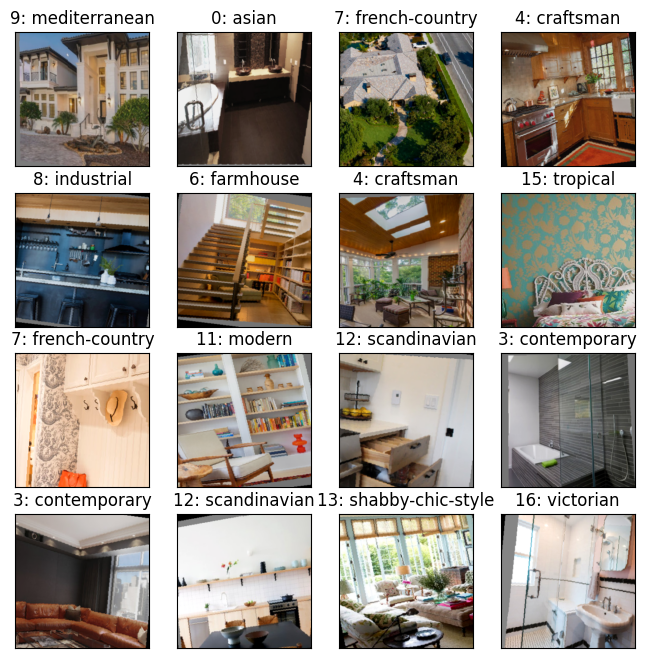

In [9]:
indoorStyleClasses = trainImages.classes

data_iter = iter(trainLoader)
images, labels = next(data_iter)

fig = plt.figure(figsize=(8, 8))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    
    img_display = images[i].numpy().transpose((1, 2, 0))
    plt.imshow(img_display)
    idx = labels[i].item()
    real_name = indoorStyleClasses[idx]
    
    ax.set_title(f"{idx}: {real_name}")

plt.show()